## Importing Useful Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

## Reading Historical Data

BTC-USD Data

In [2]:
data1=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
data1.columns=data1.columns.get_level_values(0)
data1.reset_index(inplace=True)
data2=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
data2.columns=data2.columns.get_level_values(0)
data2.reset_index(inplace=True)
data3=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
data3.columns=data3.columns.get_level_values(0)
data3.reset_index(inplace=True)
data4=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
data4.columns=data4.columns.get_level_values(0)
data4.reset_index(inplace=True)
data6=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
data6.columns=data6.columns.get_level_values(0)
data6.reset_index(inplace=True)
dd2=yf.download('BTC-USD',start='2018-01-01',end='2022-01-12')
dd2.columns=dd2.columns.get_level_values(0)
dd2.reset_index(inplace=True)
dd2['No_of_Stocks']=0
dd2['Portfolio_Value']=0
dd2['Profit_From_Initial_Capital']=0

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Risk Free Rate Data

In [4]:
data5=yf.download('^TNX', start='2018-01-01', end='2022-01-12')
data5.columns=data5.columns.get_level_values(0)
data5.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


## Indicator Calculation (MAC-D)

In [5]:
def calculate_macd(data,short_period,long_period,signal_line_period):
  data['EMA_short_period']=data['Close'].ewm(span=short_period,adjust=False).mean()
  data['EMA_long_period']=data['Close'].ewm(span=long_period,adjust=False).mean()
  data['MACD']=data['EMA_short_period']-data['EMA_long_period']
  data['Signal_MACD']=data['MACD'].ewm(span=signal_line_period,adjust=False).mean()
  data['signals']=0
  for i in range(0,len(data)):
        if data['MACD'].iloc[i]>data['Signal_MACD'].iloc[i] and data['MACD'].iloc[i-1]<data['Signal_MACD'].iloc[i-1]:
            data['signals'].iloc[i]=1
        elif data['MACD'].iloc[i]<data['Signal_MACD'].iloc[i] and data['MACD'].iloc[i-1]>data['Signal_MACD'].iloc[i-1]:
            data['signals'].iloc[i]=-1
        else:
            data['signals'].iloc[i]=0

  #Changing signals so that we hold only one position at a time
  current=data['signals'].iloc[0]
  for i in range(1,len(data)):
      if(current==1):
          if(data['signals'].iloc[i]==1):
              data['signals'].iloc[i]=0
          elif(data['signals'].iloc[i]==-1):
                current=0
          elif(current==-1):
              if(data['signals'].iloc[i]==-1):
                  data['signals'].iloc[i]=0
              elif(data['signals'].iloc[i]==1):
                  current=0

          else:
              if(data['signals'].iloc[i]==1):
                  current=1
              elif(data['signals'].iloc[i]==-1):
                  current=-1
  return data

In [6]:
data1=calculate_macd(data1,12,26,9)

Plot of MACD Indicator

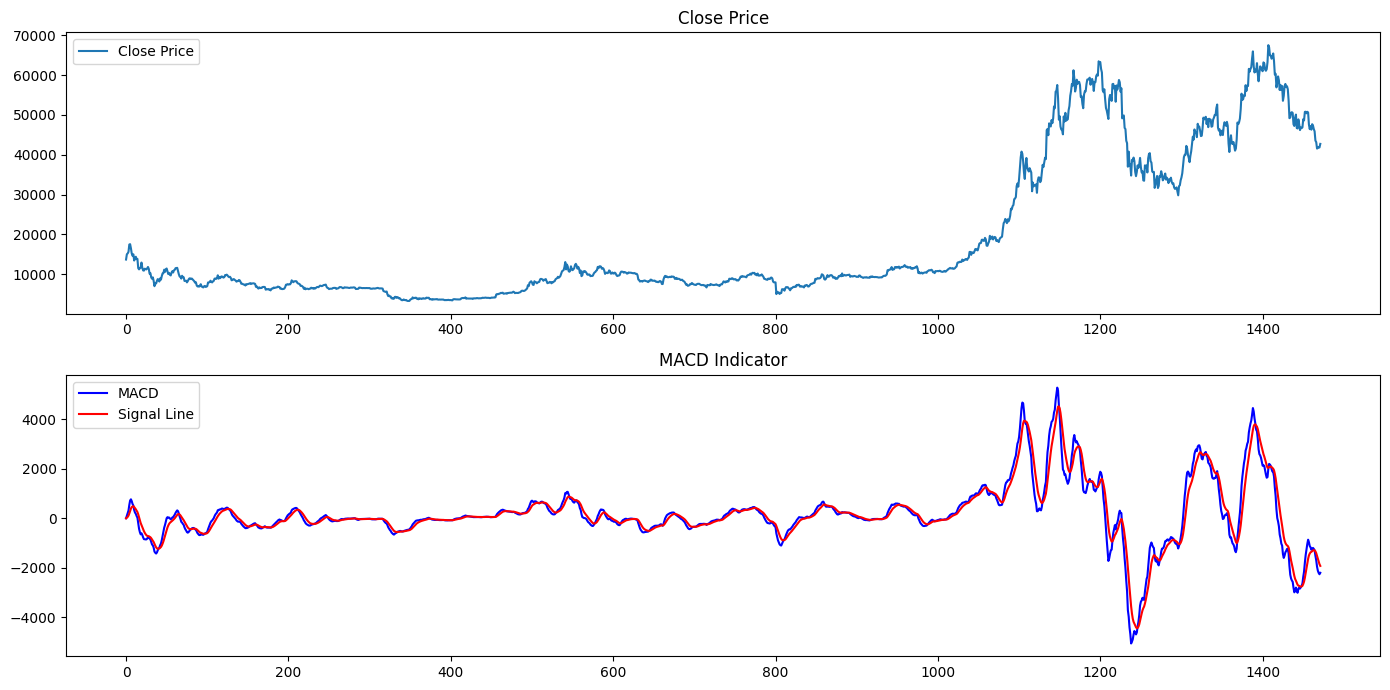

In [7]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(2, 1, 1)
plt.plot(data1.index,data1['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for MACD and Signal line
plt.subplot(2, 1, 2)
plt.plot(data1.index,data1['MACD'], label='MACD', color='blue')
plt.plot(data1.index,data1['Signal_MACD'], label='Signal Line', color='red')
plt.title('MACD Indicator')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
data2

Price,Date,Close,High,Low,Open,Volume
0,2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
1,2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2,2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
3,2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
4,2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...,...
1467,2022-01-07,41557.902344,43153.570312,41077.445312,43153.570312,84196607520
1468,2022-01-08,41733.941406,42228.941406,40672.277344,41561.464844,28066355845
1469,2022-01-09,41911.601562,42663.949219,41338.160156,41734.726562,21294384372
1470,2022-01-10,41821.261719,42199.484375,39796.570312,41910.230469,32104232331


## Indicator Calculation (Bollinger *Bands*)

In [9]:
def calculate_bb(data,multiplier):
  data['SMA']=data['Close'].rolling(window=20).mean()
  data['SD']=data['Close'].rolling(window=20).std()
  data['Upper_Band']=data['SMA']+multiplier*data['SD']
  data['Lower_Band']=data['SMA']-multiplier*data['SD']
  data['signals']=0
  for i in range(len(data)):
    # Check if the Lower_Band and Upper_Band values are not NaN before comparison
    if not pd.isna(data['Lower_Band'].iloc[i]) and not pd.isna(data['Upper_Band'].iloc[i]):
      # Ensure the comparison is between scalar values for the current row i
      if data['Close'].iloc[i] < data['Lower_Band'].iloc[i]:
        data['signals'].iloc[i]=1
      elif data['Close'].iloc[i] > data['Upper_Band'].iloc[i]:
        data['signals'].iloc[i]=-1
      else:
        data['signals'].iloc[i]=0
    else:
        # Set signal to 0 or some other value if bands are NaN (initial period)
        data['signals'].iloc[i] = 0
  return data

In [10]:
data2=calculate_bb(data2,2)

Plot of Bollinger Bands Indicator

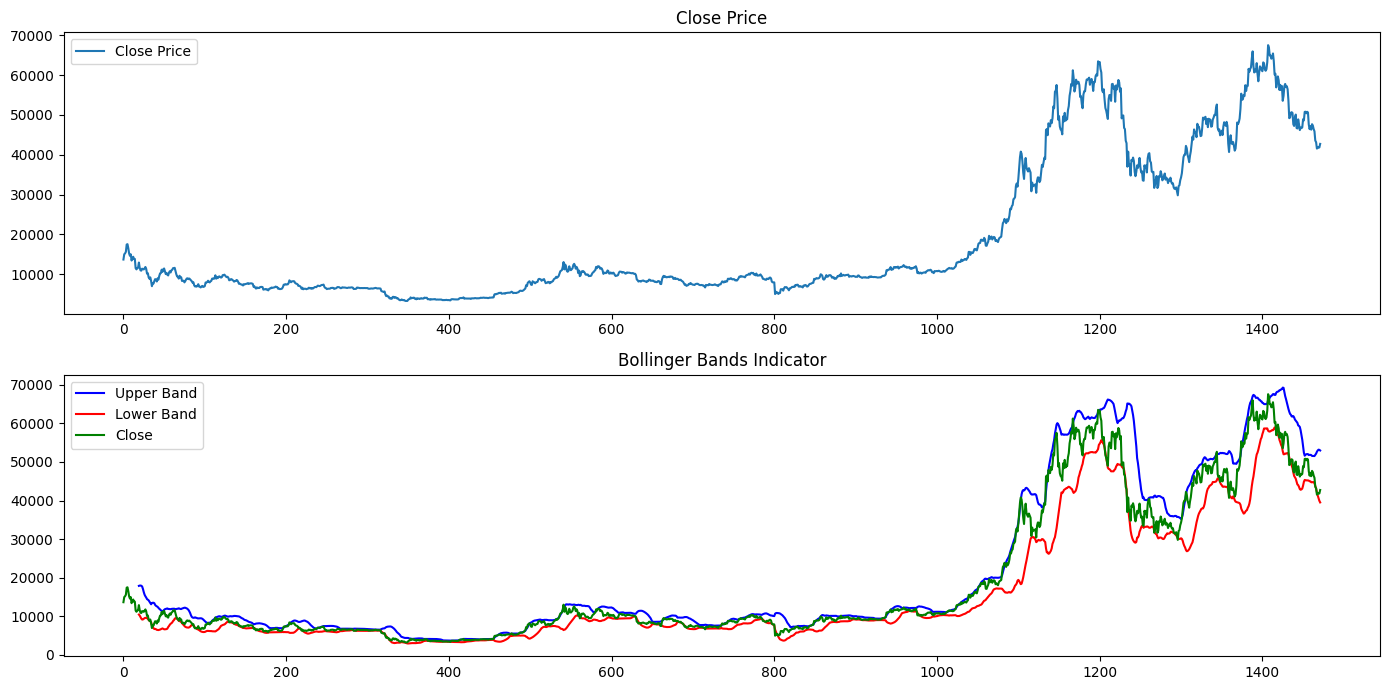

In [11]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(2, 1, 1)
plt.plot(data2.index,data2['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for Upper Band and Lower Band
plt.subplot(2, 1, 2)
plt.plot(data2.index,data2['Upper_Band'], label='Upper Band', color='blue')
plt.plot(data2.index,data2['Lower_Band'], label='Lower Band', color='red')
plt.plot(data2.index,data2['Close'], label='Close', color='green')
plt.title('Bollinger Bands Indicator')
plt.legend()
plt.tight_layout()
plt.show()

## Indicator Calculation (TRIX).

In [12]:
def tri(data,close):
  ema1=close.ewm(span=14, adjust=False).mean()
  ema2=ema1.ewm(span=14, adjust=False).mean()
  ema3=ema2.ewm(span=14, adjust=False).mean()
  trix=[]
  trix.append(0)
  for i in range(1,len(data)):
    trix.append(((ema3[i]-ema3[i-1])*100)/ema3[i-1])
  data['TRIX']=trix
  emas= data['TRIX'].ewm(span=9, adjust= False).mean()
  data['signal_line']=emas
  signal=[]
  for i in range(len(data)):
      if data['TRIX'].iloc[i]<data['signal_line'].iloc[i] and data['TRIX'].iloc[i-1]>data['signal_line'].iloc[i-1]:
        signal.append(-1)
      elif data['TRIX'].iloc[i]>data['signal_line'].iloc[i] and data['TRIX'].iloc[i-1]<data['signal_line'].iloc[i-1]:
        signal.append(1)
      else:
        signal.append(0)
  data['signals']=signal
  return data

In [13]:
close1=data3['Close']
data3=tri(data3,close1)

Plot of TRIX Indicator

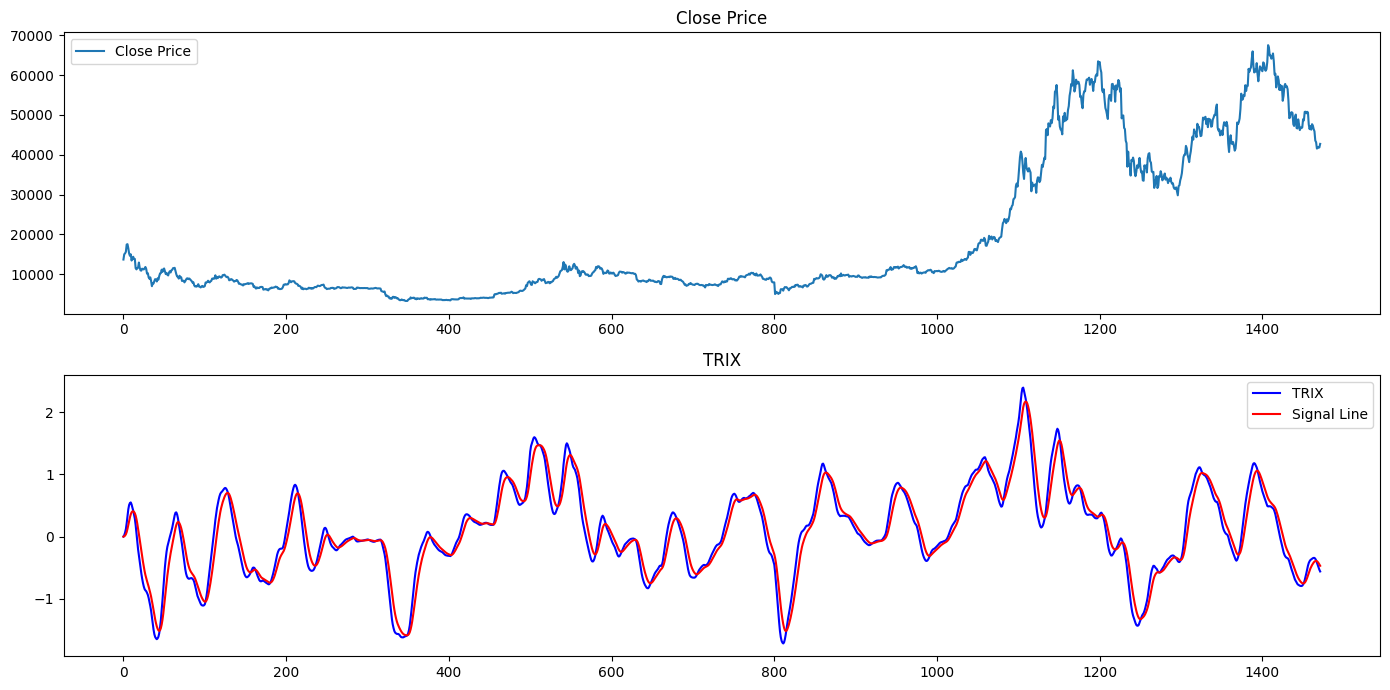

In [14]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(2, 1, 1)
plt.plot(data3.index,data3['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for MACD and Signal line
plt.subplot(2, 1, 2)
plt.plot(data3.index,data3['TRIX'], label='TRIX', color='blue')
plt.plot(data3.index,data3['signal_line'], label='Signal Line', color='red')
plt.title('TRIX')
plt.legend()
plt.tight_layout()
plt.show()

## Indicator Calculation (RSI)

In [15]:
def calculate_RSI(data):
    period=14
    data['price_change']=data['Close']-data['Close'].shift(1)
    data['gain']=data['price_change'].apply(lambda x:x if x > 0 else 0)
    data['loss']=data['price_change'].apply(lambda x:abs(x) if x < 0 else 0)
    data['avg_gain']=data['gain'].rolling(window=period,min_periods=1).mean()
    data['avg_loss']=data['loss'].rolling(window=period,min_periods=1).mean()
    data['RS']=data['avg_gain']/data['avg_loss']
    data['RSI']=100-(100/(1+data['RS']))
    data['signals']=0
    for i in range(len(data)):
      if(data['RSI'][i]<30) :
        data['signals'][i]=1
      elif(data['RSI'][i]>70) :
        data['signals'][i]=-1
      else:
        data['signals'][i]=0
    return data

In [16]:
data4=calculate_RSI(data4)

Plot of RSI

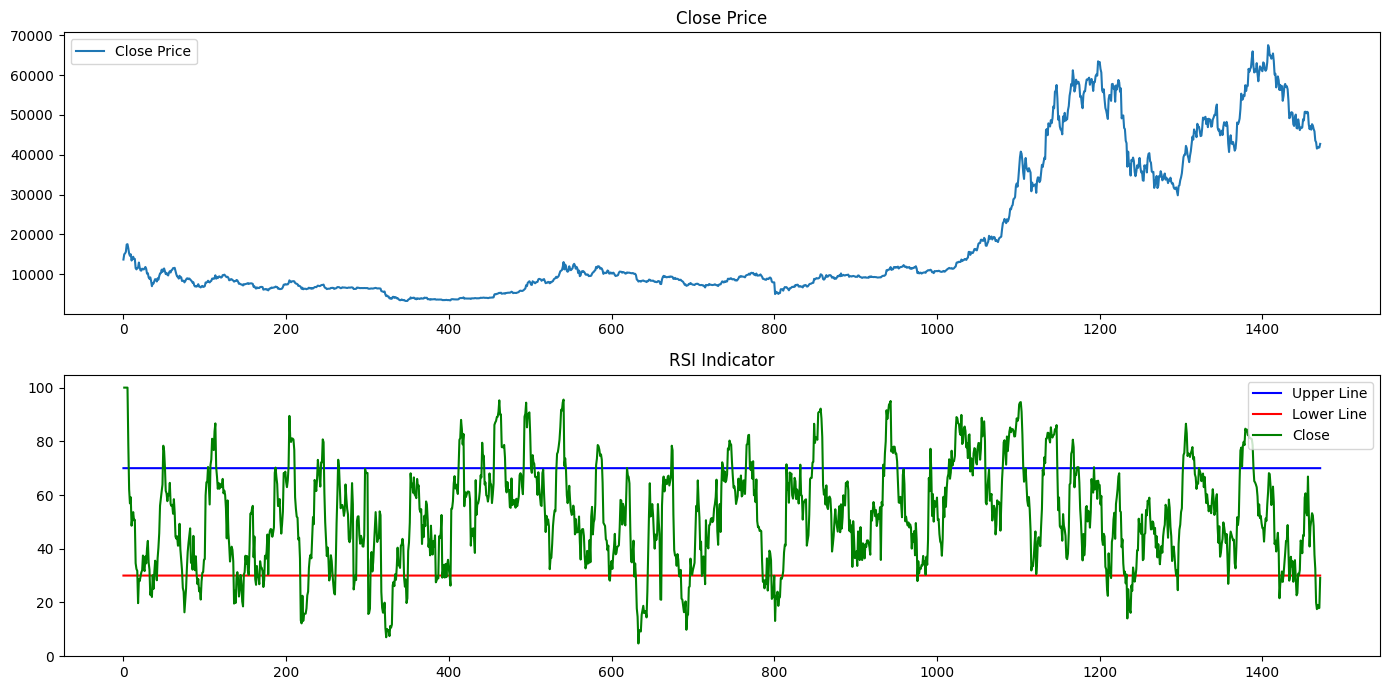

In [17]:
list1=[]
list2=[]
for i in range(len(data4)):
  list1.append(30)
  list2.append(70)
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(2, 1, 1)
plt.plot(data4.index,data2['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()
#plot for Upper Band and Lower Band
plt.subplot(2, 1, 2)
plt.plot(data4.index,list2, label='Upper Line', color='blue')
plt.plot(data4.index,list1, label='Lower Line', color='red')
plt.plot(data4.index,data4['RSI'], label='Close', color='green')
plt.title('RSI Indicator')
plt.legend()
plt.tight_layout()
plt.show()

## Main Strategy

In [18]:
def calculate_adx(data, window=14):
    data['TR'] = np.maximum(data['High'] - data['Low'],
                            np.maximum(abs(data['High'] - data['Close'].shift(1)),
                                       abs(data['Low'] - data['Close'].shift(1))))
    data['ATR'] = data['TR'].rolling(window=window).mean()

    data['+DM'] = np.where((data['High'] - data['High'].shift(1)) > (data['Low'].shift(1) - data['Low']),
                           data['High'] - data['High'].shift(1), 0)
    data['+DM'] = np.where(data['+DM'] < 0, 0, data['+DM'])

    data['-DM'] = np.where((data['Low'].shift(1) - data['Low']) > (data['High'] - data['High'].shift(1)),
                           data['Low'].shift(1) - data['Low'], 0)
    data['-DM'] = np.where(data['-DM'] < 0, 0, data['-DM'])

    data['+DI'] = 100 * (data['+DM'].rolling(window=window).sum() / data['ATR'])
    data['-DI'] = 100 * (data['-DM'].rolling(window=window).sum() / data['ATR'])

    data['DX'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI']))
    data['ADX'] = data['DX'].rolling(window=window).mean()

    return data

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']
    return data

def strategy(data):
    data = calculate_macd(data)
    data = calculate_adx(data)

    signal = [0]
    for i in range(1, len(data)):
        if ((data['+DI'].iloc[i] > data['-DI'].iloc[i]) and
            (data['+DI'].iloc[i - 1] <= data['-DI'].iloc[i - 1]) and
            (data['ADX'].iloc[i] > 20) and
            (data['MACD'].iloc[i] > data['MACD_Signal'].iloc[i])):
            signal.append(1)
        elif ((data['-DI'].iloc[i] > data['+DI'].iloc[i]) and
              (data['-DI'].iloc[i - 1] <= data['+DI'].iloc[i - 1]) and
              (data['ADX'].iloc[i] > 20) and
              (data['MACD'].iloc[i] < data['MACD_Signal'].iloc[i])):
            signal.append(-1)
        else:
            signal.append(0)

    data['Signal'] = signal

    current = 0
    for i in range(len(data)):
        if current == 1:
            if data['Signal'].iloc[i] == 1:
                data['Signal'].iloc[i] = 0
            elif data['Signal'].iloc[i] == -1:
                current = 0
        elif current == -1:
            if data['Signal'].iloc[i] == -1:
                data['Signal'].iloc[i] = 0
            elif data['Signal'].iloc[i] == 1:
                current = 0
        else:
            if data['Signal'].iloc[i] == 1:
                current = 1
            elif data['Signal'].iloc[i] == -1:
                current = -1

    num1 = 0
    num2 = 0
    for i in range(len(data)):
        if data['Signal'].iloc[i] == 1:
            num1 += 1
        elif data['Signal'].iloc[i] == -1:
            num2 += 1

    ct = 0
    j = 0
    k = 0
    if num1 < num2:
        while ct < 1:
            if data['Signal'].iloc[len(data) - j - 1] == -1:
                data['Signal'].iloc[len(data) - j - 1] = 0
                break
            j += 1
    elif num1 > num2:
        while ct < 1:
            if data['Signal'].iloc[len(data) - k - 1] == 1:
                data['Signal'].iloc[len(data) - k - 1] = 0
                break
            k += 1

    data.rename(columns={'Signal': 'signals'}, inplace=True)
    return data

In [19]:
data6=strategy(data6)
data6

Price,Date,Close,High,Low,Open,Volume,EMA12,EMA26,MACD,MACD_Signal,MACD_Hist,TR,ATR,+DM,-DM,+DI,-DI,DX,ADX,signals
0,2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,13657.200195,13657.200195,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0
1,2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,13861.030874,13755.340893,105.689982,21.137996,84.551985,2281.000000,NaN,1332.399414,0.000000,NaN,NaN,NaN,NaN,0
2,2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,14067.179971,13862.426752,204.753218,57.861041,146.892177,728.299805,NaN,128.200195,0.000000,NaN,NaN,NaN,NaN,0
3,2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,14302.875390,13991.076637,311.798753,108.648583,203.150170,1217.500000,NaN,0.000000,322.299805,NaN,NaN,NaN,NaN,0
4,2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,14783.894561,14245.774664,538.119897,194.542846,343.577051,2502.399414,NaN,1965.499023,0.000000,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2022-01-07,41557.902344,43153.570312,41077.445312,43153.570312,84196607520,45592.068592,47545.917058,-1953.848465,-1516.506694,-437.341772,2083.484375,1916.840960,0.000000,1568.093750,73.381438,579.601506,77.524240,21.506581,0
1468,2022-01-08,41733.941406,42228.941406,40672.277344,41561.464844,28066355845,44998.510564,47115.400343,-2116.889779,-1636.583311,-480.306469,1556.664062,1960.896205,0.000000,405.167969,71.732785,573.075614,77.750667,26.246201,0
1469,2022-01-09,41911.601562,42663.949219,41338.160156,41734.726562,21294384372,44523.601487,46729.933767,-2206.332280,-1750.533105,-455.799175,1325.789062,1943.218750,435.007812,0.000000,94.771280,546.712325,70.452470,31.085403,0
1470,2022-01-10,41821.261719,42199.484375,39796.570312,41910.230469,32104232331,44107.856907,46366.328430,-2258.471523,-1852.120788,-406.350735,2402.914062,2010.794085,0.000000,1541.589844,53.792881,605.005074,83.669384,34.903168,0


## Main Function

In [25]:
def calculate(data9,dd1):

  balance=1000000 #Capital for Investing.
  capital=1000000
  stop_loss=14 # Percentage for stop loss
  take_profit=14  # Percentage for take profit
  multiplier=7 # Multiplier for Average True Range Stop Loss
  maxDrawdownLimit=25 # Drawdown Limit to Exit a Trade

  no_of_stocks=0
  position=0
  num_stocks=[] #List of no. of stocks hold in each trade
  returns=[] #List containing return from each trade
  capitall=[] #List containing capital after each trade
  remains=[] #List containing not invested capital for each trade
  remainss=[] #List containing not invested capital for each trade
  max__drawdown=[] #List containing Max Drawdown for each trade
  max__dip=[] #List containing Max Dip for each trade
  pv=[]
  j=0
  l=0
  pf=[]
  trades=[]
  rfr1=[]
  buy_signals=[]
  sell_signals=[]
  tsll=[]
  ttpl=[]
  drawdown2=[]

  twd1=pd.DataFrame(columns=['Entry Index','Exit Index','Trade Duration','Entry Price','Exit Price','Returns for Trade in %','Type of Trade','Trade Close By','No. of Stocks Traded','Profit/Loss','Capital'])

  for i in range(len(data9)):
    if(capital>0):
      if(position==1):
        slp=twd1['Entry Price'].iloc[j]-(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Long Trades usnig ATR
      elif(position==-1):
        slp=twd1['Entry Price'].iloc[j]+(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Short Trades using ATR
      # Taking a Long position
      if data9['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(remain1)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"long",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=1
          trades.append(i)

      # Long position with stop loss condition
      elif (position==1 and ((max__drawdown2>=maxDrawdownLimit) or (((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl) or (data9['Close'].iloc[i]<=slp))):
          if((((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl)):
            twd1['Trade Close By'].iloc[j]="trailing_stop_loss"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          else:
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss"
          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)


      # Taking a Short position
      elif data9['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(0)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"short",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=-1
          trades.append(i)

      # Short position with trailing take profit condition or stop loss condition
      elif (position==-1 and ((((data9['Close'].iloc[i]*no_of_stocks)+remain1)>=ttp) or (data9['Close'].iloc[i]>=slp) or (max__drawdown2>=maxDrawdownLimit))):
          if((((data9['Close'].iloc[i]*no_of_stocks)+remain1)>=ttp)):
            twd1['Trade Close By'].iloc[j]="trailing_take_profit"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          else:
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss"
          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      # Long position with sell signal
      elif data9['signals'].iloc[i]==-1 and position==1:
          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      # Short position with buy signal condition
      elif data9['signals'].iloc[i]==1 and position==-1:
          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      dd1['No_of_Stocks'].iloc[i]=no_of_stocks
      if(no_of_stocks!=0):
        if(position==1):
          dd1['Portfolio_Value'].iloc[i]=(no_of_stocks*data9['Close'].iloc[i])+remain1
        else:
          dd1['Portfolio_Value'].iloc[i]=capital+(no_of_stocks*(price-data9['Close'].iloc[i]))
      else:
        dd1['Portfolio_Value'].iloc[i]=capital
      dd1['Profit_From_Initial_Capital'].iloc[i]=((dd1['Portfolio_Value'].iloc[i]-balance)/balance)*100
      if(position==1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          maxx=max(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown2=(max(drawdown2))
        tsl=(1-(stop_loss/100))*maxx
        tsll.append(tsl)
        pf.clear()
        drawdown2.clear()
      if(position==-1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          minn=min(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown2=(max(drawdown2))
        ttp=(1+(take_profit/100))*minn
        ttpl.append(ttp)
        pf.clear()
        drawdown2.clear()
      if(position==0 or position==-1):
        tsll.append(dd1['Portfolio_Value'].iloc[i])
      if(position==0 or position==1):
        ttpl.append(dd1['Portfolio_Value'].iloc[i])


  if(twd1['Exit Index'].iloc[len(twd1)-1]==0):
    data9['signals'].iloc[twd1['Entry Index'].iloc[len(twd1)-1]]=0
    twd1=twd1.drop(len(twd1)-1,axis=0)
    trades.pop()
  for i in range(len(data9)):
    if(data9['signals'].iloc[i]==1):
      buy_signals.append(i)
    elif(data9['signals'].iloc[i]==-1):
      sell_signals.append(i)
  #Calculating Maximum Drawdown and Maximum Dip for each Trade.
  dd1['Current Position']=0
  a=0
  for i in range(0,((int(len(trades)/2)))*2,2):
    drawdown=[]
    index1=trades[i]
    index2=trades[i+1]
    stocks=num_stocks[a]
    remain=remains[a]
    max1=dd1['Portfolio_Value'].iloc[index1]
    min1=dd1['Portfolio_Value'].iloc[index1]
    for j in range(index1,index2+1):
      portfolio=dd1['Portfolio_Value'].iloc[j]
      if (portfolio>max1):
        max1=portfolio
      if (portfolio<min1):
        min1=portfolio
      drawdown.append(((max1-portfolio)/portfolio)*100)
      # rfr1.append(data5['Close'].iloc[j])
    max__drawdown.append(max(drawdown))
    max__dip.append(((dd1['Portfolio_Value'].iloc[index1]-min1)/(dd1['Portfolio_Value'].iloc[index1]))*100)
    a=a+1

  twd1['Max Drawdown for Trade']=max__drawdown
  twd1['Max Dip for Trade']=max__dip


  #Code

  #Benchmark Return and Total Returns
  num=int(balance/data9['Close'].iloc[0])
  remain_=balance-num*data9['Close'].iloc[0]
  br=((((num*data9['Close'].iloc[len(data9)-1])+remain_)-balance)/balance)*100
  print("Benchmark Return is:",br,"%")

  #Trades
  print("Number of Close Trades are:",int(len(trades)/2))
  wt=0
  lt=0
  total_returns=0
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]>0):
      wt+=1
    elif(twd1['Returns for Trade in %'].iloc[i]<0):
      lt+=1
    total_returns+=twd1['Returns for Trade in %'].iloc[i]
  print("Number of Winning Trades are:",wt)
  print("Number of Losing Trades are:",lt)
  print("Total Returns of Strategy:",(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]),"%")
  #Gross Profit and Net Profit
  gp=(balance*(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]))/100
  print("Gross Profit is:",gp)
  #Max Drawdown
  maxDrawdown=max(max__drawdown)
  print("Maximun Drawdown is:",maxDrawdown,"%")
  #Avg. Drawdown
  avgDrawdown=twd1['Max Drawdown for Trade'].mean()
  print("Average Drawdown is:",avgDrawdown,"%")
  #Max Dip
  maxDip=max(twd1['Max Dip for Trade'])
  print("Maximun Dip is:",maxDip,"%")
  #Avg. Dip
  avgDip=twd1['Max Dip for Trade'].mean()
  print("Average Dip is:",avgDip,"%")
  holding_time=twd1['Trade Duration']
  print("Maximum Holding Time:",max(holding_time))
  print("Average Holding Time:",sum(holding_time)/len(holding_time))
  #Sharpe Ratio and Sortino Ratio
  returns1=twd1['Returns for Trade in %']
  negative_returns1=[]
  rfr1.clear()
  rfr1=data5['Close']
  # entry1=trades[0]
  # exit1=trades[len(trades)-1]
  # for i in range(entry1,exit1+1):
  #   rfr1.append(data5['Close'].iloc[i])
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]<0):
      negative_returns1.append(twd1['Returns for Trade in %'].iloc[i])
  mean_rfr1=sum(rfr1)/len(rfr1)
  mean_returns1=returns1.mean()
  mean_neg_returns1=sum(negative_returns1)/len(negative_returns1)
  array1=np.array(negative_returns1)
  std_neg_returns1=np.std(array1,ddof=1)
  std_returns1=returns1.std()
  y=((math.sqrt(252)))
  sharpeRatio1=y*((mean_returns1-mean_rfr1)/std_returns1)
  sortinoRatio1=y*((mean_returns1-mean_rfr1)/std_neg_returns1)
  print("Calculated Sharpe Ratio of the strategy is:",sharpeRatio1)
  print("Calculated Sortino Ratio of the strategy is:",sortinoRatio1)
  return twd1,dd1,buy_signals,sell_signals,tsll,ttpl

Strategy Metrics

In [26]:
dataa=data6.copy()
dataa['TR'] = np.maximum(dataa['High'] - dataa['Low'],
                            np.maximum(abs(dataa['High'] - dataa['Close'].shift(1)),
                                       abs(dataa['Low'] - dataa['Close'].shift(1))))
dataa['ATR'] = dataa['TR'].rolling(window=14).mean()
ddf=dd2.copy()
a1,a2,buy1,sell1,tsll1,ttpl1=calculate(dataa,ddf)

Benchmark Return is: 212.27418349609377 %
Number of Close Trades are: 21
Number of Winning Trades are: 14
Number of Losing Trades are: 7
Total Returns of Strategy: 638.5633151855469 %
Gross Profit is: 6385633.151855469
Maximun Drawdown is: 27.538382682517494 %
Average Drawdown is: 13.633148815420778 %
Maximun Dip is: 18.969855841056642 %
Average Dip is: 5.418992326228529 %
Maximum Holding Time: 80
Average Holding Time: 29.476190476190474
Calculated Sharpe Ratio of the strategy is: 6.671503908134283
Calculated Sortino Ratio of the strategy is: 31.162130572468225


Plot of Buy-Sell Signals

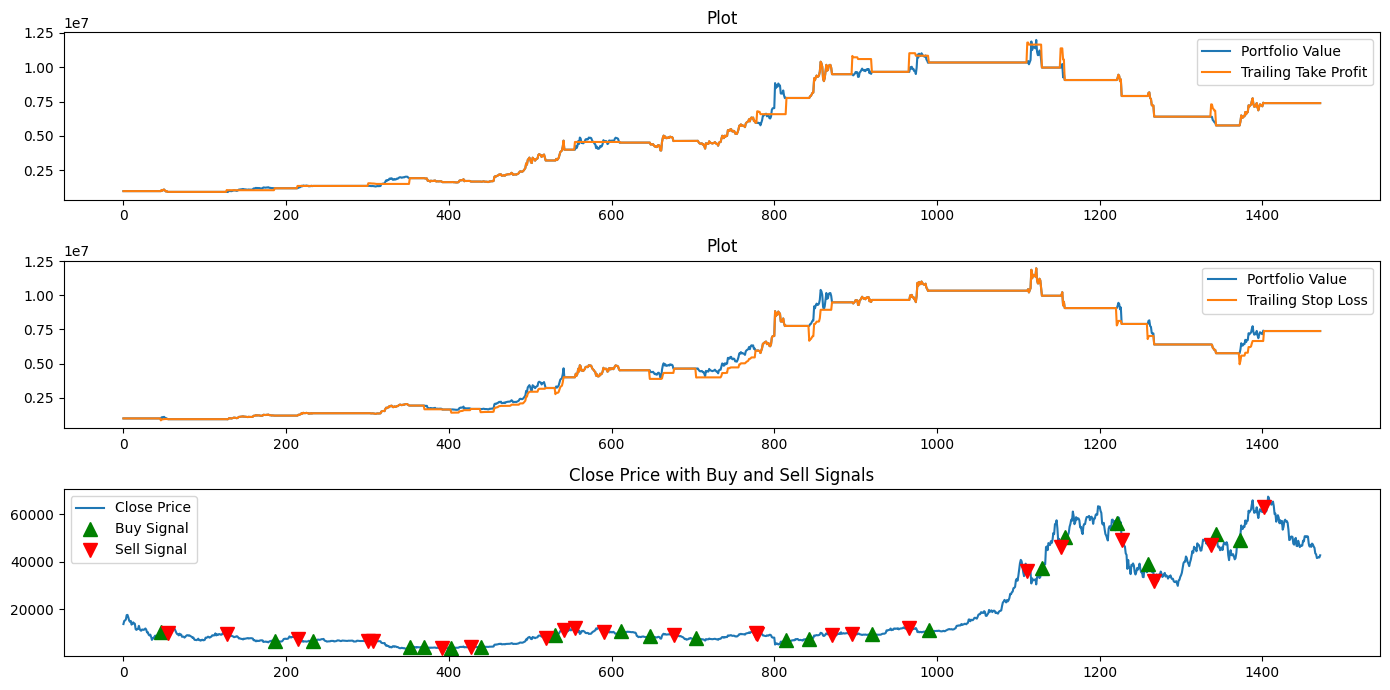

In [27]:
plt.figure(figsize=(14, 7))
#plot for closing price
plt.subplot(3, 1, 1)
plt.plot(dataa.index,a2['Portfolio_Value'], label='Portfolio Value')
plt.plot(dataa.index,ttpl1, label='Trailing Take Profit')
plt.title('Plot')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(dataa.index,a2['Portfolio_Value'], label='Portfolio Value')
plt.plot(dataa.index,tsll1, label='Trailing Stop Loss')
plt.title('Plot')
plt.legend()
#plot for Buy and Sell Signals
plt.subplot(3, 1, 3)
#plot for closing price
plt.plot(dataa.index,dataa['Close'],label='Close Price')
#plot buy signals
plt.plot(buy1,dataa['Close'][buy1],'^', markersize=10, color='g', label='Buy Signal')
#plot sell signals
plt.plot(sell1, dataa['Close'][sell1],'v', markersize=10, color='r', label='Sell Signal')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.tight_layout()
plt.show()

TradeWise DataFrame

In [28]:
a1

,Entry Index,Exit Index,Trade Duration,Entry Price,Exit Price,Returns for Trade in %,Type of Trade,Trade Close By,No. of Stocks Traded,Profit/Loss,Capital,Max Drawdown for Trade,Max Dip for Trade
0,46,55,9,10233.900391,9664.730469,-5.561613,long,trailing_stop_loss,97,-5.520948e+04,9.447905e+05,17.853700,5.520948
1,127,186,59,9234.820312,6673.500000,27.735465,short,signal,102,2.612547e+05,1.206045e+06,6.512702,0.975524
2,214,233,19,7434.390137,6376.709961,14.226859,short,signal,162,1.713442e+05,1.377389e+06,4.770991,0.000000
3,301,352,51,6332.629883,3745.950684,40.846840,short,signal,217,5.613094e+05,1.938699e+06,5.948160,3.111664
4,370,392,22,4076.632568,3470.450439,-14.869678,long,trailing_stop_loss,475,-2.879365e+05,1.650762e+06,17.442640,14.852050
5,403,427,24,3666.780273,3761.557129,2.584743,long,signal,450,4.264958e+04,1.693412e+06,10.123726,1.360265
6,439,519,80,4048.725830,7707.770996,90.375227,long,signal,418,1.529481e+06,3.222893e+06,14.240842,2.114306
7,531,542,11,8994.488281,11182.806641,24.329548,long,trailing_stop_loss,358,7.834180e+05,4.006311e+06,16.383305,0.000000
8,555,611,56,12156.512695,10594.493164,12.849240,short,signal,329,5.139044e+05,4.520215e+06,20.123691,0.000000
9,647,677,30,8586.473633,8813.582031,2.644955,long,signal,526,1.194590e+05,4.639674e+06,14.572005,12.718643


Daily DataFrame

In [29]:
a2=a2.drop('Current Position',axis=1)
a2

Price,Date,Close,High,Low,Open,Volume,No_of_Stocks,Portfolio_Value,Profit_From_Initial_Capital
0,2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,0,1.000000e+06,0.000000
1,2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,0,1.000000e+06,0.000000
2,2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,0,1.000000e+06,0.000000
3,2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,0,1.000000e+06,0.000000
4,2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,0,1.000000e+06,0.000000
...,...,...,...,...,...,...,...,...,...
1467,2022-01-07,41557.902344,43153.570312,41077.445312,43153.570312,84196607520,0,7.385633e+06,638.563315
1468,2022-01-08,41733.941406,42228.941406,40672.277344,41561.464844,28066355845,0,7.385633e+06,638.563315
1469,2022-01-09,41911.601562,42663.949219,41338.160156,41734.726562,21294384372,0,7.385633e+06,638.563315
1470,2022-01-10,41821.261719,42199.484375,39796.570312,41910.230469,32104232331,0,7.385633e+06,638.563315
